## K Means Clustering

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd 
import numpy as np
%matplotlib inline

In [2]:
X, y = make_blobs(n_samples=1000, centers=3, n_features=2)

In [3]:
X

array([[-2.27603341,  7.41340065],
       [-1.00228657, -1.95709692],
       [-3.24699744,  6.43332177],
       ...,
       [10.97922016, -5.13992962],
       [ 9.69276256, -4.56484155],
       [-1.3076782 , -3.11718808]], shape=(1000, 2))

In [4]:
y

array([0, 2, 0, 0, 2, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 2,
       1, 0, 1, 2, 1, 0, 2, 1, 2, 2, 0, 2, 2, 0, 0, 2, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 2, 0, 0, 2, 1, 0, 0, 1, 2, 2, 2, 1, 0, 2, 2, 0, 2,
       1, 2, 2, 1, 2, 2, 2, 0, 2, 0, 2, 0, 2, 1, 1, 0, 2, 1, 1, 2, 1, 1,
       2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 0, 1, 1, 0, 1, 2, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 0, 2, 1, 1, 0, 2, 1, 0, 0, 0,
       1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 0, 1, 2, 1, 1, 1, 1, 2, 1, 2,
       2, 1, 1, 0, 0, 0, 2, 1, 0, 2, 2, 2, 0, 0, 1, 2, 2, 0, 1, 2, 2, 0,
       1, 2, 1, 1, 2, 0, 0, 2, 1, 2, 0, 2, 1, 1, 1, 1, 0, 0, 2, 2, 0, 2,
       2, 0, 2, 1, 0, 0, 1, 2, 0, 1, 0, 2, 2, 2, 0, 0, 2, 2, 1, 0, 2, 1,
       0, 0, 1, 2, 2, 2, 1, 2, 0, 1, 0, 1, 1, 2, 1, 1, 1, 1, 0, 2, 1, 1,
       0, 1, 2, 1, 2, 1, 0, 2, 1, 0, 2, 2, 2, 2, 0, 1, 0, 0, 2, 0, 0, 1,
       0, 2, 2, 0, 0, 1, 1, 1, 0, 0, 0, 2, 1, 1, 2, 0, 0, 2, 0, 1, 0, 0,
       2, 2, 0, 1, 0, 1, 1, 2, 0, 2, 1, 1, 2, 1, 0,

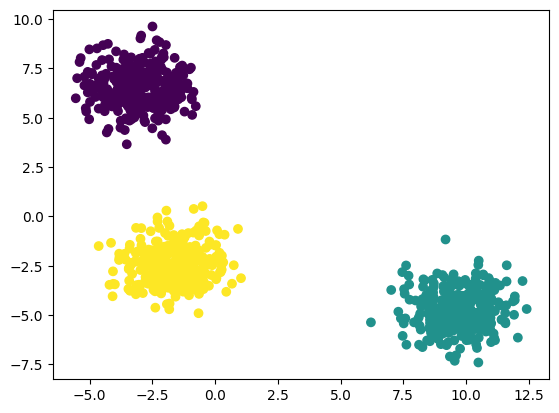

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y)

#### Train/ Test split

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#### Standardization

In [6]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [8]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
from sklearn.cluster import KMeans


#### Elbow method to select the value of K

In [11]:
wcss = []
for k in range(1, 11):
      kmeans=KMeans(n_clusters=k, init="k-means++")
      kmeans.fit(X_train_scaled)
      wcss.append(kmeans.inertia_)

In [12]:
wcss

[1340.0000000000002,
 405.8340319039376,
 44.97256376207625,
 39.137382363669104,
 35.51904763320427,
 28.98389389618504,
 26.262138110204617,
 23.041709368334423,
 21.78953042647414,
 18.12020725605694]

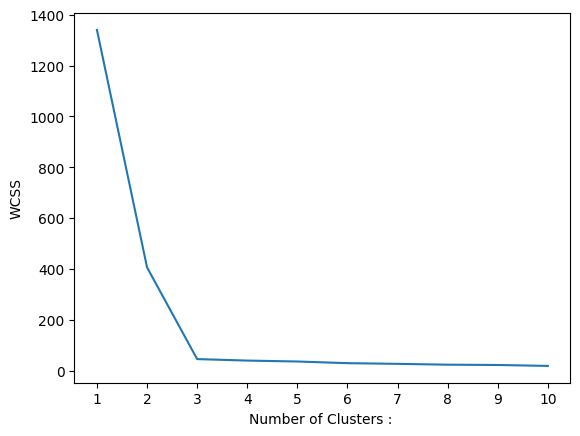

In [13]:
## Plot Elbow curve.

plt.plot(range(1, 11), wcss)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters : ")
plt.ylabel("WCSS")
plt.show()

In [14]:
kmeans = KMeans(n_clusters=3, init="k-means++")

In [16]:
kmeans.fit_predict(X_train_scaled)

array([0, 0, 2, 2, 0, 2, 2, 1, 0, 2, 0, 0, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 2, 1, 2, 2, 2, 0, 0, 1, 2, 0, 2, 2,
       1, 2, 2, 0, 1, 0, 0, 1, 1, 1, 0, 2, 1, 1, 0, 2, 2, 0, 1, 0, 1, 1,
       2, 2, 0, 1, 1, 1, 1, 1, 2, 2, 0, 0, 0, 2, 0, 1, 0, 0, 2, 0, 1, 0,
       1, 0, 0, 0, 0, 2, 2, 2, 1, 0, 2, 0, 0, 0, 2, 1, 2, 0, 0, 2, 2, 1,
       2, 0, 2, 1, 1, 0, 2, 1, 2, 0, 0, 1, 2, 2, 0, 2, 1, 1, 1, 2, 2, 0,
       0, 0, 2, 1, 1, 1, 0, 1, 1, 2, 1, 2, 1, 1, 2, 0, 0, 0, 1, 2, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 0, 0, 2, 0,
       2, 2, 0, 1, 1, 2, 2, 0, 1, 2, 1, 1, 0, 1, 1, 2, 2, 2, 0, 2, 1, 0,
       0, 1, 1, 2, 2, 0, 2, 0, 2, 0, 2, 2, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 2, 2, 0, 0, 1, 0, 0, 1, 2, 2, 0, 2, 1, 2, 0, 2, 0, 1, 1, 1,
       2, 0, 1, 1, 1, 0, 2, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 2,
       0, 2, 2, 2, 1, 2, 1, 2, 0, 2, 2, 1, 1, 1, 2, 2, 2, 0, 1, 0, 0, 1,
       0, 2, 1, 0, 1, 0, 2, 0, 1, 1, 1, 0, 1, 2, 2,

In [18]:
y_pred = kmeans.predict(X_test_scaled)
y_pred

array([0, 1, 0, 1, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 0, 0, 2, 0, 0, 2,
       2, 1, 2, 1, 1, 0, 1, 1, 1, 2, 2, 0, 1, 2, 2, 0, 1, 2, 1, 2, 0, 2,
       1, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 0, 0, 1, 1, 0, 2, 2, 2, 0,
       1, 2, 2, 0, 2, 2, 2, 1, 1, 1, 0, 1, 0, 2, 0, 1, 2, 2, 0, 0, 1, 2,
       0, 1, 0, 2, 0, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 0, 1, 2, 2, 0, 1, 0,
       1, 2, 0, 2, 1, 2, 1, 0, 1, 0, 1, 2, 2, 2, 1, 1, 1, 2, 0, 0, 1, 1,
       2, 1, 0, 0, 0, 2, 2, 2, 1, 1, 2, 2, 2, 0, 0, 2, 0, 2, 2, 0, 2, 1,
       0, 1, 2, 0, 1, 0, 1, 2, 1, 1, 0, 2, 2, 2, 0, 1, 0, 0, 1, 2, 1, 2,
       2, 0, 0, 1, 1, 2, 0, 1, 1, 2, 0, 0, 2, 0, 1, 0, 2, 0, 0, 2, 1, 0,
       0, 2, 1, 2, 0, 2, 2, 2, 2, 2, 1, 1, 2, 1, 0, 0, 1, 0, 0, 2, 1, 2,
       0, 0, 1, 2, 2, 0, 1, 2, 1, 0, 0, 0, 0, 2, 2, 2, 1, 2, 0, 1, 0, 1,
       1, 2, 2, 1, 0, 0, 1, 2, 2, 0, 2, 0, 0, 1, 1, 0, 1, 0, 2, 2, 1, 2,
       0, 1, 0, 1, 2, 0, 0, 2, 2, 1, 0, 0, 0, 1, 0, 2, 2, 1, 2, 0, 2, 0,
       1, 1, 2, 0, 1, 1, 1, 0, 2, 2, 1, 1, 0, 1, 2,

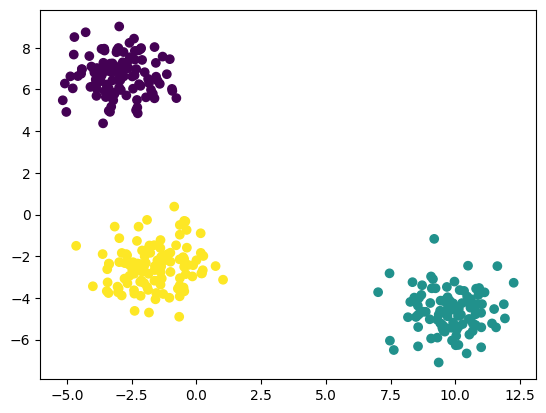

In [19]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)

#### For validating the K value there are total 3 ways:
1. kneelocator
2. Silhoutee scoring

In [20]:
## kneelocator
from kneed import KneeLocator

In [21]:
k1 = KneeLocator(range(1, 11), wcss, curve='convex', direction='decreasing')

In [23]:
print(k1.elbow)

3


In [24]:
## Silhoutte Scoring

from sklearn.metrics import silhouette_score

In [25]:
silhouette_coefficients=[]
for k in range(2, 11):
      kmeans = KMeans(n_clusters=k, init='k-means++')
      kmeans.fit(X_test_scaled)
      score = silhouette_score(X_test_scaled, kmeans.labels_)
      silhouette_coefficients.append(score)

In [26]:
silhouette_coefficients

[np.float64(0.6473887407658493),
 np.float64(0.8219800759530705),
 np.float64(0.6561687541059431),
 np.float64(0.4806699203098903),
 np.float64(0.32637169189904364),
 np.float64(0.3395569858374768),
 np.float64(0.3125709014578705),
 np.float64(0.34245339518334816),
 np.float64(0.3225140696467891)]

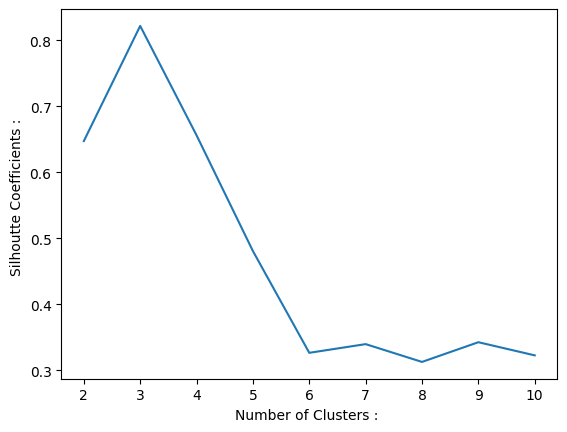

In [27]:
## Plotting silhoutte score
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel('Number of Clusters : ')
plt.ylabel('Silhoutte Coefficients : ')
plt.show()